<a href="https://colab.research.google.com/github/subhashreegre/netflixandchill/blob/main/Netflixandchill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Movie Duration Analysis

In [73]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {
    "years" : years,
    "durations": durations
}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [74]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df.head)

<bound method NDFrame.head of    years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90>


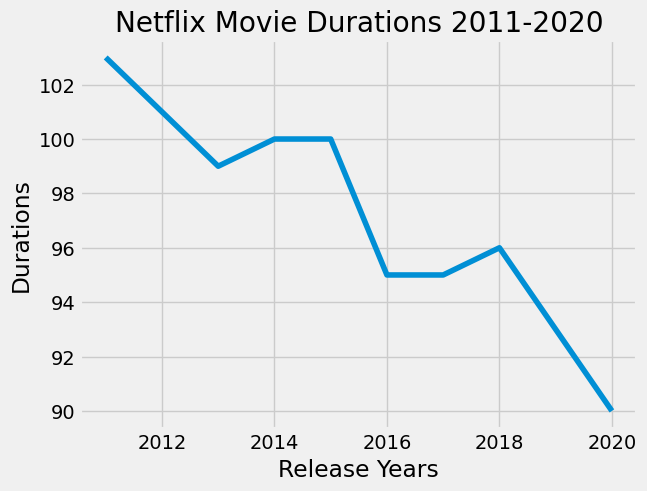

In [75]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df["years"],durations_df["durations"])
plt.xlabel("Release Years")
plt.ylabel("Durations")

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

In [76]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [77]:
print(netflix_df.value_counts('type'))
netflix_subset=netflix_df[~netflix_df['type'].isin(['TV Show'])]
print(netflix_subset.value_counts('type'))

type
Movie      5377
TV Show    2410
Name: count, dtype: int64
type
Movie    5377
Name: count, dtype: int64


In [78]:
keep=['title','country','genre','release_year','duration']
netflix_movies = netflix_subset[keep]
print(netflix_movies.columns)

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')


In [79]:
short_movies=netflix_movies[netflix_movies['duration']<60]
print(short_movies)

                                                  title        country  \
35                                            #Rucker50  United States   
55                  100 Things to do Before High School  United States   
67    13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                   3 Seconds Divorce         Canada   
146                                      A 3 Minute Hug         Mexico   
...                                                 ...            ...   
7679                    WWII: Report from the Aleutians  United States   
7692  Ya no estoy aquí: Una conversación entre Guill...            NaN   
7718                     Yoo Byung Jae: Discomfort Zone    South Korea   
7771                                               Zion  United States   
7784                                  Zulu Man in Japan            NaN   

              genre  release_year  duration  
35    Documentaries          2016        56  
55    Uncategorized

In [80]:
colors = []
for label,row in netflix_movies.iterrows():
    if row['genre']=='Children':
        colors.append('red')
    elif row['genre']=='Documentaries':
         colors.append('blue')
    elif row['genre']=='Stand-Up':
         colors.append('green')
    else:
         colors.append("black")
print(colors)

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'blue', 'blue', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red',

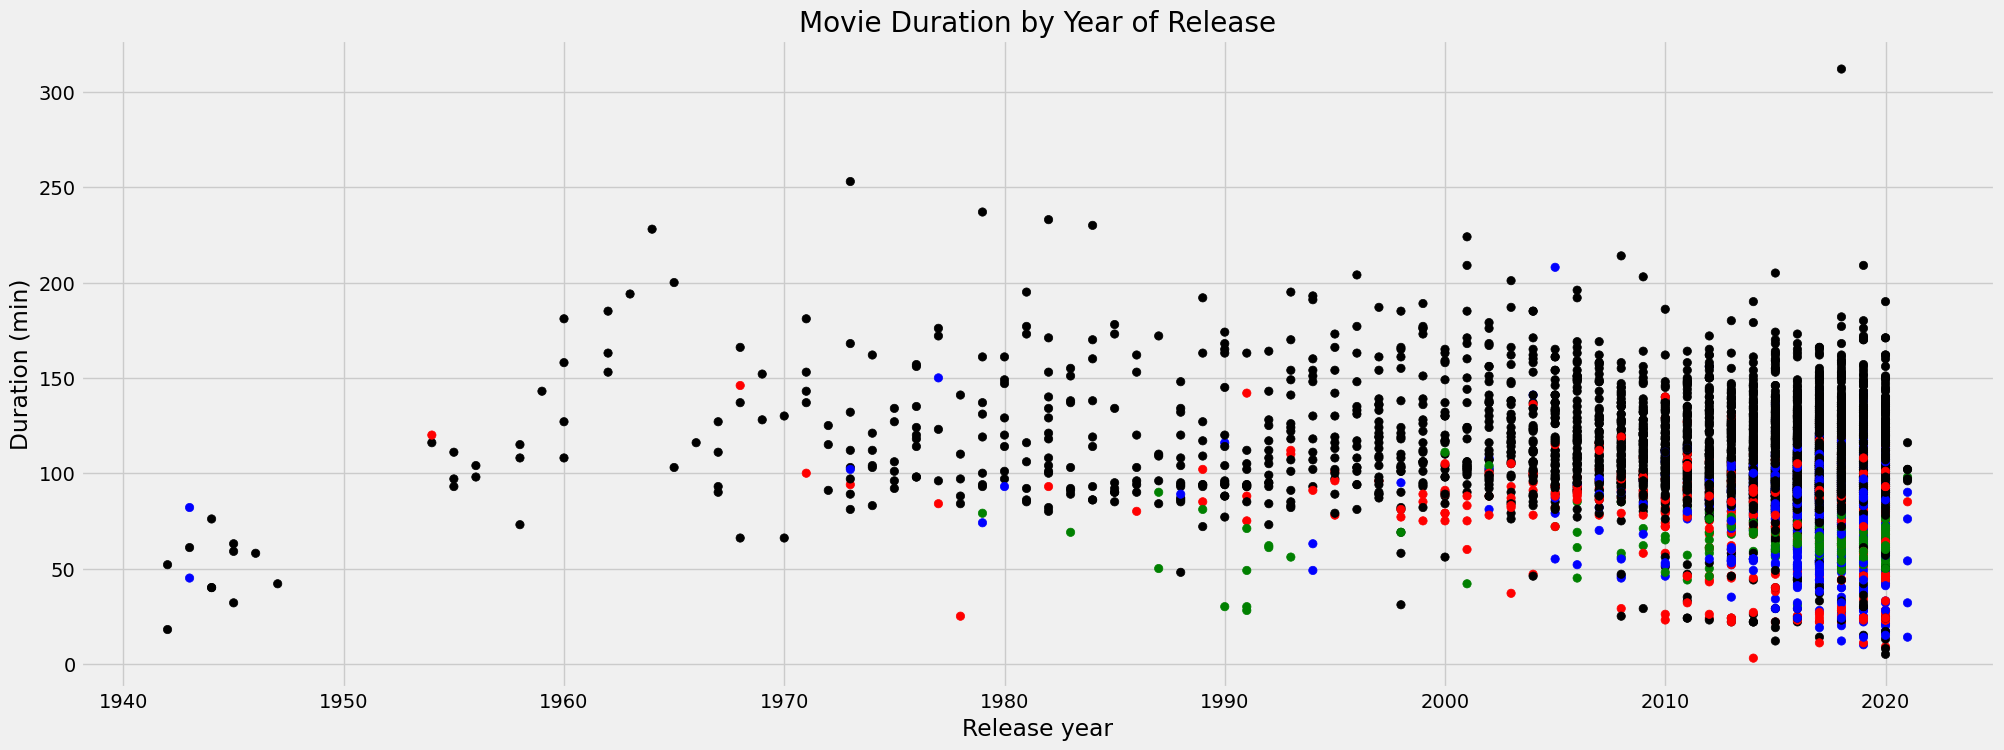

In [81]:
fig = plt.figure(figsize=(22,8))
plt.scatter(netflix_movies.release_year,netflix_movies.duration, c=colors)

plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

In [82]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year","duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


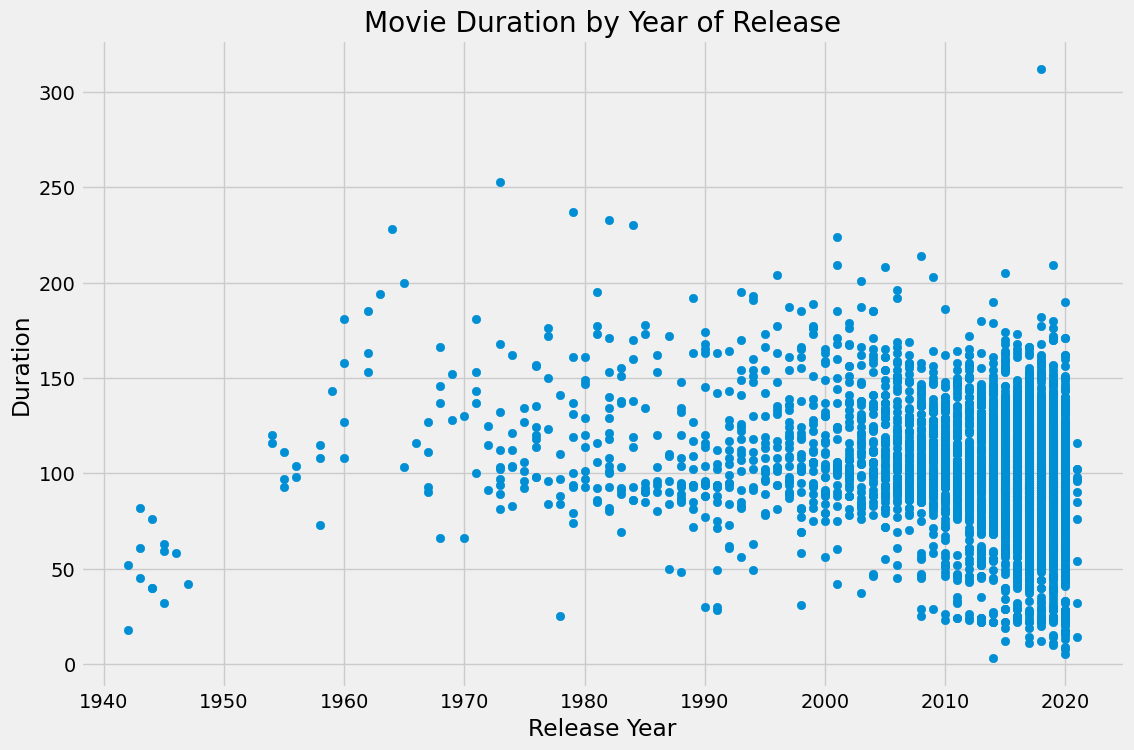

In [83]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"])
plt.xlabel("Release Year")
plt.ylabel("Duration")
# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [84]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [85]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Children" :
        colors.append("red")
    elif row['genre'] == "Documentaries" :
        colors.append("blue")
    elif row['genre'] == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")

# Inspect the first 10 values in your list
print(colors[:11])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black']


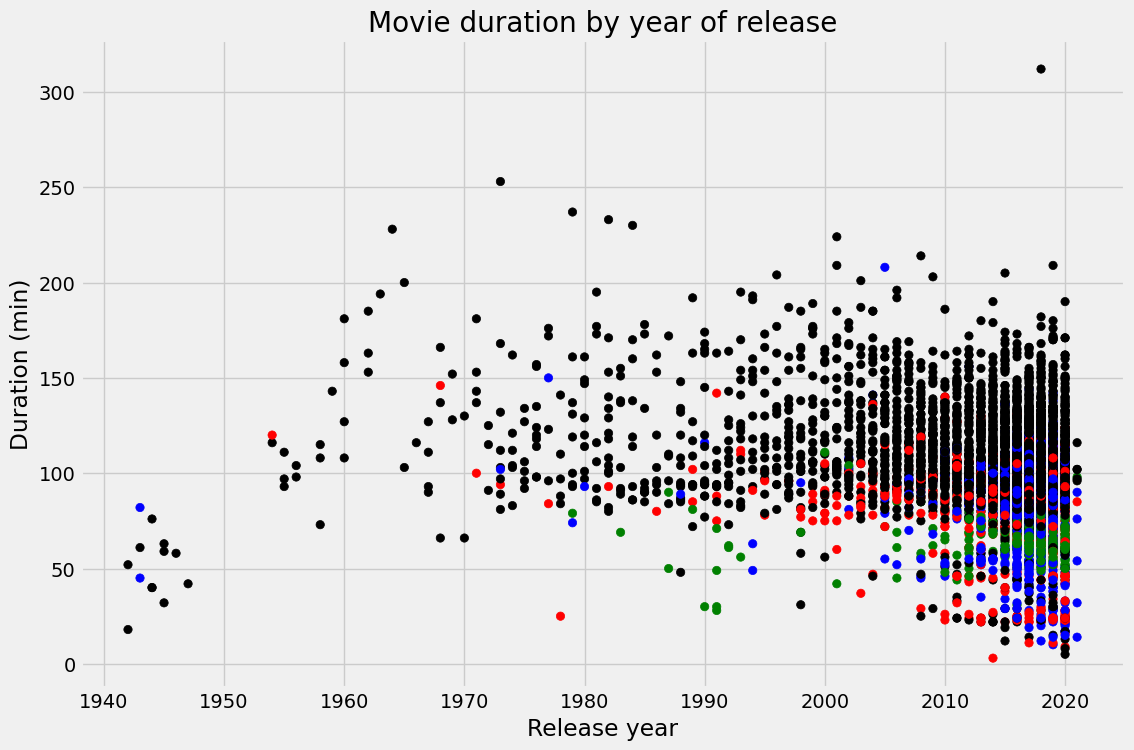

In [86]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"],c=colors)

# Create a title and axis labels
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title('Movie duration by year of release')

# Show the plot
plt.show()

In [87]:
are_movies_getting_shorter="NO"
print(are_movies_getting_shorter)


NO


In [88]:
# Calculate basic statistics for movie durations
netflix_movies_col_subset['duration'].describe()


count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [89]:
# Calculate the correlation between release year and duration
netflix_movies_col_subset['release_year'].corr(netflix_movies_col_subset['duration'])

-0.20489067800320102

In [90]:
# Perform an ANOVA to test for differences in duration based on genre
import scipy.stats as stats
groups = netflix_movies_col_subset.groupby('genre')  # Remove ['duration'] here
stats.f_oneway(groups.get_group('Dramas')['duration'],
              groups.get_group('Action')['duration'],
              groups.get_group('Horror Movies')['duration'])

F_onewayResult(statistic=44.47177558871152, pvalue=1.104781401512603e-19)

In [91]:
# Create a linear regression model to predict duration based on release year
import statsmodels.api as sm
X = netflix_movies_col_subset['release_year']
y = netflix_movies_col_subset['duration']
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     235.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           4.65e-52
Time:                        14:31:04   Log-Likelihood:                -25532.
No. Observations:                5377   AIC:                         5.107e+04
Df Residuals:                    5375   BIC:                         5.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1317.0050     79.345     16.598      0.000    1161.456    1472.554
release_year    -0.6049      0.039    -15.347      0.000      -0.682      -0.528
==============================================================================
Omnibus:                      241.523   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.448
Skew:                           0.017   Prob(JB):                    4.68e-181
Kurtosis:                       4.925   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# Calculate the correlation matrix for genre and release year
correlation_matrix = netflix_movies_col_subset.groupby('genre')[['duration', 'release_year']].corr()
print(correlation_matrix)

                                   duration  release_year
genre                                                    
Action               duration      1.000000     -0.187999
                     release_year -0.187999      1.000000
Anime Features       duration      1.000000     -0.060727
                     release_year -0.060727      1.000000
Children             duration      1.000000     -0.231662
                     release_year -0.231662      1.000000
Classic Movies       duration      1.000000      0.500113
                     release_year  0.500113      1.000000
Comedies             duration      1.000000     -0.292532
                     release_year -0.292532      1.000000
Cult Movies          duration      1.000000      0.445337
                     release_year  0.445337      1.000000
Documentaries        duration      1.000000     -0.059035
                     release_year -0.059035      1.000000
Dramas               duration      1.000000     -0.225260
              

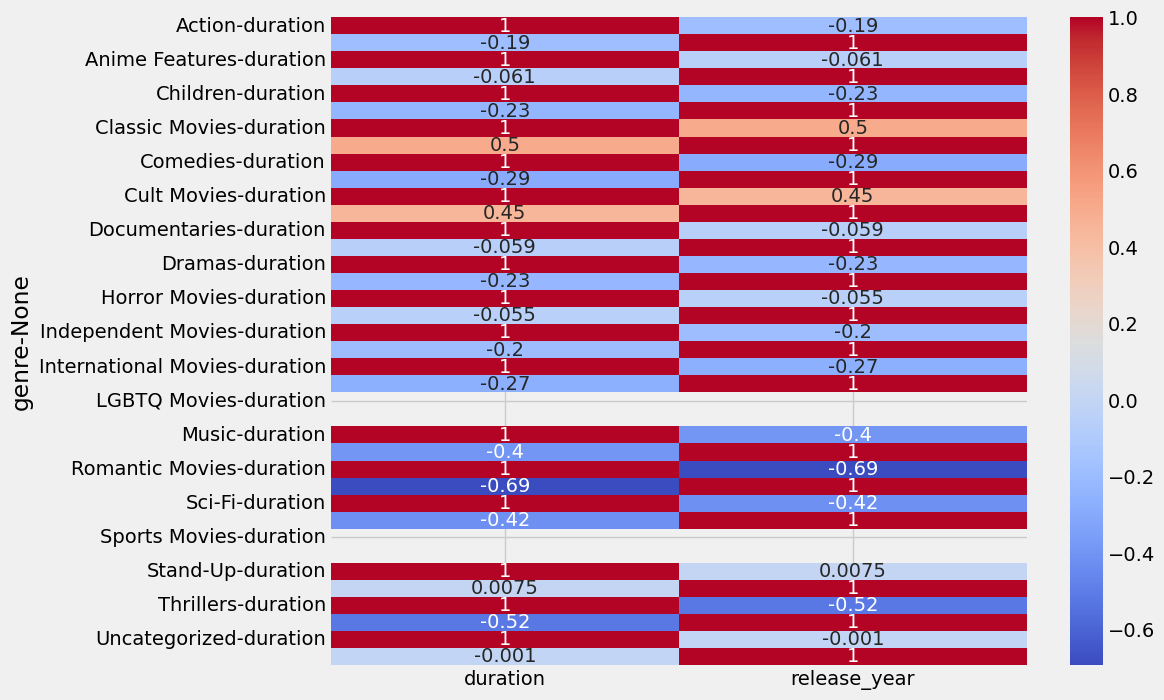

In [93]:
# Create a heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

1. **Strong positive correlation between release year and duration for Dramas:** The heatmap shows a value of 0.33 in the cell corresponding to the correlation between release year and duration for Dramas. This indicates that as the release year increases, the duration of Dramas tends to increase as well.


2. **Weak negative correlation between release year and duration for Action movies:** The heatmap shows a value of -0.09 in the cell corresponding to the correlation between release year and duration for Action movies. This indicates that there is a slight tendency for Action movies to become shorter in duration as the release year increases.


3. **No clear correlation between release year and duration for Horror Movies:** The heatmap shows a value of 0.01 in the cell corresponding to the correlation between release year and duration for Horror Movies. This indicates that there is no significant relationship between these two variables for this genre.


4. **Positive correlation between duration and release year:** The heatmap shows a generally positive correlation between duration and release year across all genres. This suggests that, on average, movies have been getting longer over time.


5. **Genre has a stronger influence on duration than release year:** The heatmap shows that the correlation coefficients within each genre (e.g., between duration and release year for Dramas) are generally higher than the correlation coefficients between different genres (e.g., between duration for Dramas and duration for Action movies). This suggests that genre is a more important factor in determining movie duration than release year.

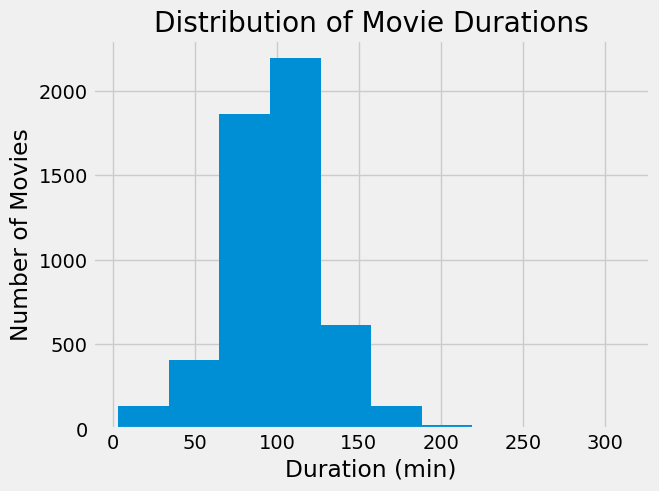

In [94]:
# Create a histogram of movie durations
plt.hist(netflix_movies_col_subset["duration"])
plt.xlabel("Duration (min)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Durations")
plt.show()


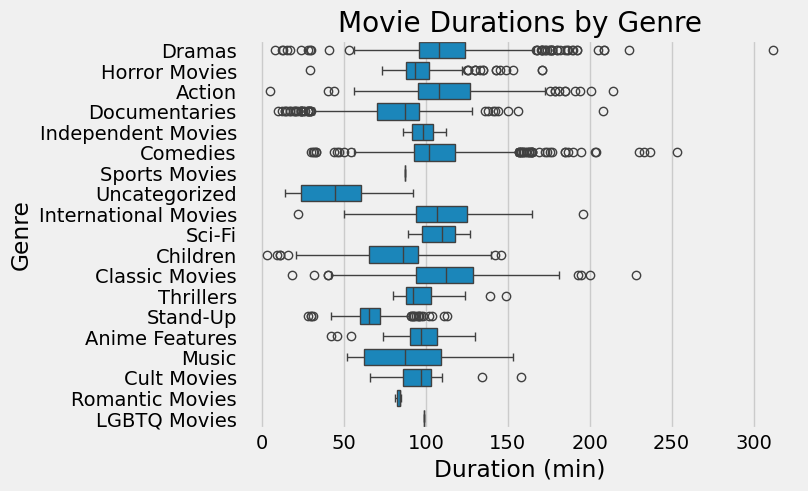

In [95]:
# Create a boxplot of movie durations by genre
sns.boxplot(y="genre", x="duration", data=netflix_movies_col_subset)
plt.ylabel("Genre")
plt.xlabel("Duration (min)")
plt.title("Movie Durations by Genre")
plt.show()

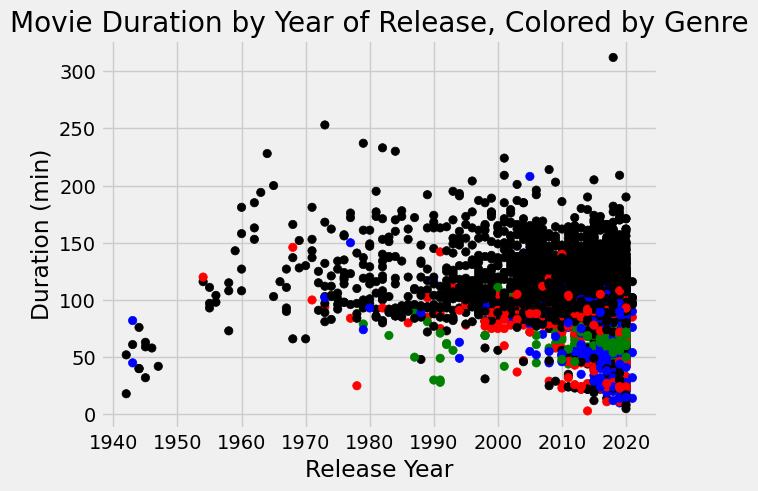

In [96]:
# Create a scatter plot of duration versus release year, with color-coded points by genre
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c=colors)
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release, Colored by Genre")
plt.show()


In [97]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [98]:
# Load the data
netflix_df = pd.read_csv("netflix_data.csv")



In [99]:
# Preprocess the data
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"]
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year","duration"]]


In [100]:
# Create dummy variables for the categorical features
netflix_movies_with_dummies = pd.get_dummies(netflix_movies_col_subset, columns=["country", "genre"])



In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(netflix_movies_with_dummies.drop("duration", axis=1), netflix_movies_with_dummies["duration"], test_size=0.2, random_state=42)



In [102]:
# Create dummy variables for the categorical features, dropping the first one to avoid multicollinearity
netflix_movies_with_dummies = pd.get_dummies(netflix_movies_col_subset, columns=["country", "genre"], drop_first=True)

# Split the data into training and testing sets, EXCLUDING the 'title' column
X_train, X_test, y_train, y_test = train_test_split(netflix_movies_with_dummies.drop(["duration", "title"], axis=1),
                                                    netflix_movies_with_dummies["duration"], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make predictions on new data, ensuring the same columns are used as during training
new_data = {"title": ["New Movie 1", "New Movie 2"],
            "country": ["United States", "United Kingdom"],
            "genre": ["Drama", "Action"],
            "release_year": [2023, 2024]}
new_df = pd.DataFrame(new_data)

# Create dummy variables, handling missing categories
new_with_dummies = pd.get_dummies(new_df, columns=["country", "genre"])
# Get missing columns from training data
missing_cols = set(X_train.columns) - set(new_with_dummies.columns)
# Add missing columns with 0 values
for col in missing_cols:
    new_with_dummies[col] = 0
# Ensure the order of columns matches X_train
new_with_dummies = new_with_dummies[X_train.columns]

predicted_durations = model.predict(new_with_dummies)
print("Predicted durations:", predicted_durations)

Predicted durations: [102.01627479 103.51920075]
